In [ ]:
!pip install kaggle

In [ ]:
ls -l /content/kaggle.json

ls: cannot access '/content/kaggle.json': No such file or directory


In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)


In [ ]:
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:11<00:00, 58.9MB/s]
100% 812M/812M [00:11<00:00, 74.0MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.5981.jpg', 'cat.11788.jpg', 'cat.6165.jpg', 'cat.5470.jpg', 'cat.8328.jpg', 'cat.4893.jpg', 'cat.7608.jpg', 'dog.5190.jpg', 'cat.11611.jpg', 'cat.10239.jpg', 'dog.4948.jpg', 'dog.10577.jpg', 'dog.491.jpg', 'dog.12238.jpg', 'cat.1193.jpg', 'cat.10742.jpg', 'dog.10252.jpg', 'dog.1865.jpg', 'dog.4002.jpg', 'dog.6026.jpg', 'cat.9819.jpg', 'dog.3396.jpg', 'cat.9554.jpg', 'dog.4754.jpg', 'cat.10812.jpg', 'dog.8170.jpg', 'cat.5722.jpg', 'cat.1646.jpg', 'dog.10106.jpg', 'dog.4412.jpg', 'dog.3034.jpg', 'dog.8203.jpg', 'dog.1254.jpg', 'cat.1729.jpg', 'cat.11412.jpg', 'cat.1084.jpg', 'dog.3094.jpg', 'cat.8257.jpg', 'dog.2232.jpg', 'cat.4911.jpg', 'cat.1021.jpg', 'dog.7154.jpg', 'dog.5694.jpg', 'cat.10386.jpg', 'cat.11584.jpg', 'cat.10637.jpg', 'cat.12078.jpg', 'dog.4573.jpg', 'dog.7680.jpg', 'cat.2726.jpg', 'dog.3360.jpg', 'cat.6993.jpg', 'dog.4669.jpg', 'dog.695.jpg', 'dog.11272.jpg', 'dog.2094.jpg', 'cat.11631.jpg', 'cat.4863.jpg', 'dog.8027.jpg', 'dog.7867.jpg', 'dog.8929.jpg', 'cat.6398

In [41]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

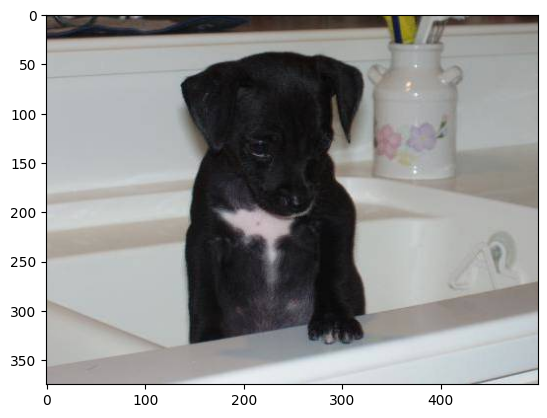

In [42]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

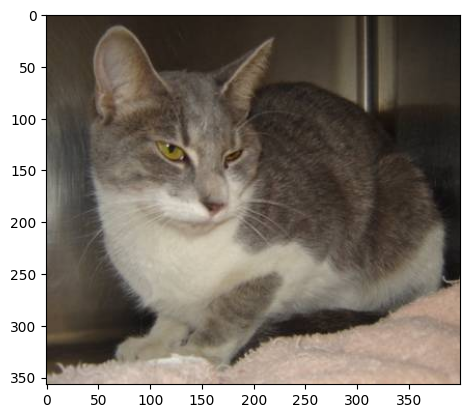

In [43]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [44]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

dog
cat
cat
cat
cat


In [46]:
for i in range(10):
  print(file_names[i])

dog.5981.jpg
cat.11788.jpg
cat.6165.jpg
cat.5470.jpg
cat.8328.jpg
cat.4893.jpg
cat.7608.jpg
dog.5190.jpg
cat.11611.jpg
cat.10239.jpg


In [47]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [48]:
#creating a directory for resized images
os.mkdir('/content/image resized1')

In [49]:
original_folder = '/content/train/'
resized_folder = '/content/image resized1/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

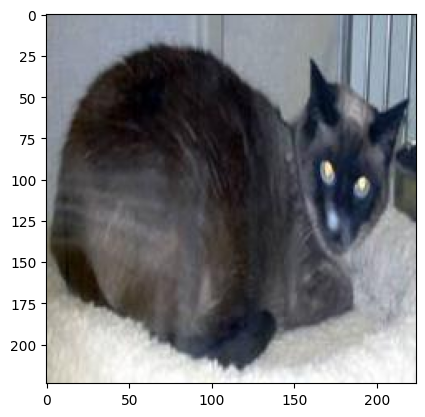

In [50]:
# display resized dog image
img = mpimg.imread('/content/image resized1/cat.10005.jpg')
imgplt = plt.imshow(img)
plt.show()

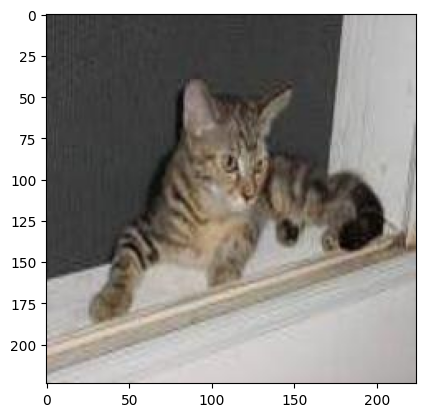

In [51]:
# display resized cat image
img = mpimg.imread('/content/image resized1/cat.10028.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [52]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized1/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [53]:
print(filenames[0:5])
print(len(filenames))

['dog.5981.jpg', 'cat.11788.jpg', 'cat.6165.jpg', 'cat.5470.jpg', 'cat.8328.jpg']
2000


In [54]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 0, 0]
2000


In [55]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1025  975]


Converting all the resized images to numpy arrays

In [56]:
import cv2
import glob

In [58]:
image_directory = '/content/image resized1/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [59]:
print(dog_cat_images)

[[[[146 151 150]
   [149 154 155]
   [149 160 164]
   ...
   [190 201 215]
   [187 198 212]
   [184 195 209]]

  [[146 150 151]
   [149 156 159]
   [152 162 169]
   ...
   [188 199 213]
   [187 198 212]
   [184 195 209]]

  [[148 153 156]
   [149 158 162]
   [152 163 171]
   ...
   [186 197 211]
   [186 197 211]
   [186 197 211]]

  ...

  [[165 174 188]
   [167 176 190]
   [163 174 188]
   ...
   [180 191 205]
   [180 191 205]
   [181 192 206]]

  [[158 167 181]
   [162 171 185]
   [160 171 185]
   ...
   [177 188 202]
   [176 187 201]
   [177 188 202]]

  [[144 153 167]
   [151 160 174]
   [154 165 179]
   ...
   [178 189 203]
   [175 186 200]
   [175 186 200]]]


 [[[ 16  15  17]
   [ 27  26  28]
   [ 28  27  29]
   ...
   [ 49  49  61]
   [ 51  51  63]
   [ 52  52  64]]

  [[ 14  13  15]
   [ 20  19  21]
   [ 22  21  23]
   ...
   [ 50  50  62]
   [ 50  50  62]
   [ 51  51  63]]

  [[ 17  16  18]
   [ 18  17  19]
   [ 20  19  21]
   ...
   [ 50  50  62]
   [ 50  50  62]
   [ 49  49

In [60]:
type(dog_cat_images)

numpy.ndarray

In [61]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [62]:
X = dog_cat_images
Y = np.asarray(labels)

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [65]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [66]:
print(X_train_scaled)

[[[[0.3254902  0.32941176 0.19607843]
   [0.3372549  0.34117647 0.20784314]
   [0.38039216 0.38431373 0.25098039]
   ...
   [0.69803922 0.64313725 0.53333333]
   [0.65882353 0.59215686 0.48627451]
   [0.70588235 0.63137255 0.5254902 ]]

  [[0.29019608 0.29411765 0.16078431]
   [0.26666667 0.27058824 0.1372549 ]
   [0.32156863 0.3254902  0.19215686]
   ...
   [0.61960784 0.57647059 0.47058824]
   [0.67843137 0.61960784 0.51764706]
   [0.69803922 0.63921569 0.5372549 ]]

  [[0.43921569 0.43921569 0.29803922]
   [0.30980392 0.30980392 0.16862745]
   [0.27843137 0.27843137 0.1372549 ]
   ...
   [0.52941176 0.51372549 0.41568627]
   [0.56862745 0.54117647 0.44313725]
   [0.65882353 0.61960784 0.5254902 ]]

  ...

  [[0.61960784 0.65098039 0.61176471]
   [0.64705882 0.67843137 0.63529412]
   [0.55294118 0.58431373 0.54117647]
   ...
   [0.42745098 0.47843137 0.41568627]
   [0.49019608 0.54117647 0.47843137]
   [0.55686275 0.61176471 0.54117647]]

  [[0.69803922 0.74117647 0.67843137]
   [0.6

Building the Neural Network

In [67]:
import tensorflow as tf
import tensorflow_hub as hub

In [68]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
!pip install tensorflow==2.15.0 tensorflow-hub==0.13.0 keras==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.16.1
    Uninstalling tensorflow-hub-0.16.1:
      Successfully uninstalled tensorflow-hub-0.16.1
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.

In [69]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [70]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [71]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 93s 1s/step - loss: 0.2032 - acc: 0.9162
Epoch 2/5
50/50 [==============================] - 66s 1s/step - loss: 0.0679 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 63s 1s/step - loss: 0.0483 - acc: 0.9819
Epoch 4/5
50/50 [==============================] - 65s 1s/step - loss: 0.0406 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 63s 1s/step - loss: 0.0331 - acc: 0.9894


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0734 - acc: 0.9825
Test Loss = 0.07337480783462524
Test Accuracy = 0.9825000166893005


Predictive System

Path of the image to be predicted: /content/image resized/cat.10005.jpg


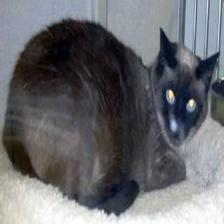

1/1 [==============================] - 1s 639ms/step
[[ 4.164115  -4.5602493]]
0
The image represents a Cat


In [ ]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/train/dog.10799.jpg


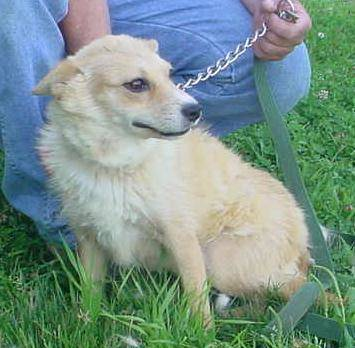

1/1 [==============================] - 0s 75ms/step
[[-3.7990797  1.4577985]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [40]:
!rm -r /content/image resized

rm: cannot remove '/content/image': No such file or directory
rm: cannot remove 'resized': No such file or directory
